In [93]:
from os import listdir
from os.path import isfile, join
from fr_model import *
from fr_utils import *
import numpy as np

## Load files and use model to calculate image vector

In [94]:
database = {}
FRModel = FaceRecognitionModel()
mypath='db'
for f in listdir(mypath):
    if (isfile(join(mypath, f))):
        person_id = os.path.splitext(f)[0]
        database[person_id] = FRModel.img_to_encoding_from_path(join(mypath,f))
 

## Calculate distances between all images and create dataframe

In [95]:
cols = []
data = []
for key1 in database:
    row = []
    cols.append(key1)
    for key2 in database:
        dist = np.linalg.norm(database[key1] - database[key2])
        row.append(dist)
    data.append(row)
df_dist = pd.DataFrame(data=data, index=cols, columns=cols)

## Perform dimensionality reduction with tsne and visualize

In [96]:
from sklearn.manifold import TSNE
import pandas as pd

In [97]:
feat_cols = [ "" + str(i) for i in range(128) ]
df = pd.DataFrame(list(map(np.ravel, database.values())),columns=feat_cols)
df['label'] = database.keys()
df['label'] = df['label'].str.extract('([a-zA-ZäüöÄÖÜ-]+)')

In [98]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.drop('label', axis=1),feat_cols)

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.644001
[t-SNE] Error after 300 iterations: 0.691372


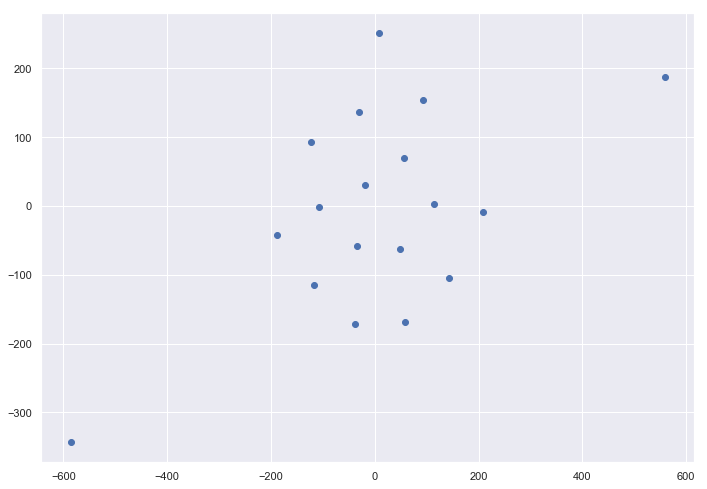

In [99]:
import matplotlib.pyplot as plt
plt.scatter(tsne_results[0:,0] , tsne_results[0:,1])

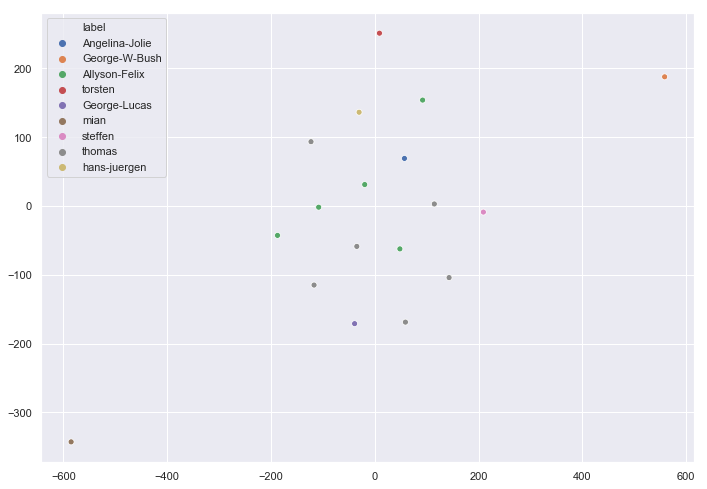

In [100]:
import seaborn as sns; sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x=tsne_results[0:,0], y=tsne_results[0:,1],hue=df['label'])

## Display distance between all images

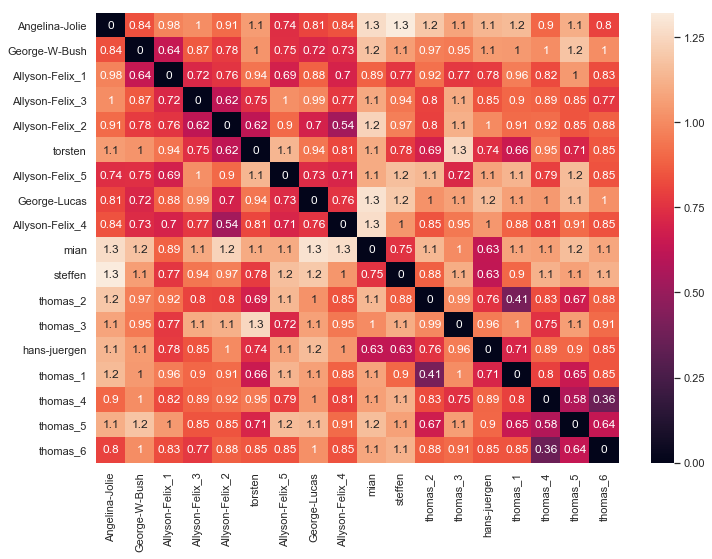

In [101]:
ax = sns.heatmap(df_dist,annot=True)

Thomas_1: ![Thomas_1](db/thomas_1.jpg)
Thomas_2: ![Thomas_2](db/thomas_2.jpg)
Thomas_3: ![Thomas_3](db/thomas_3.jpg)
Thomas_4: ![Thomas_4](db/thomas_4.jpg)
Thomas_5: ![Thomas_5](db/thomas_5.jpg)
Thomas_6: ![Thomas_6](db/thomas_6.jpg)

Note the rather low distance of thomas_4 and thomas_6. Thomas_6 has been created from thomas_4 by de-saturating and darkening the image.

Thomas_4 and Thomas_5 have been taken under same light conditions. Difference are the glasses. Glasses and just changes in brightness seem not have to high impact.

However, looking at thomas_3 where the face is tilted upwards creates a large distance. 